In [ ]:
 pip install fastf1

  Using cached fastf1-3.4.0-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
session = fastf1.get_session(2022, 'Saudi Arabia', 'Q')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
DEBUG:fastf1.api:Falling back to livetiming mirror (https://livetiming-mirror.fastf1.dev)
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
DEBUG:fastf1.api:Falling back to livetiming mirror (https://livetim

In [ ]:
laps_ver = session.laps.pick_driver('VER')
fastest_lap = laps_ver.pick_fastest()

telemetry = fastest_lap.get_car_data().add_distance()


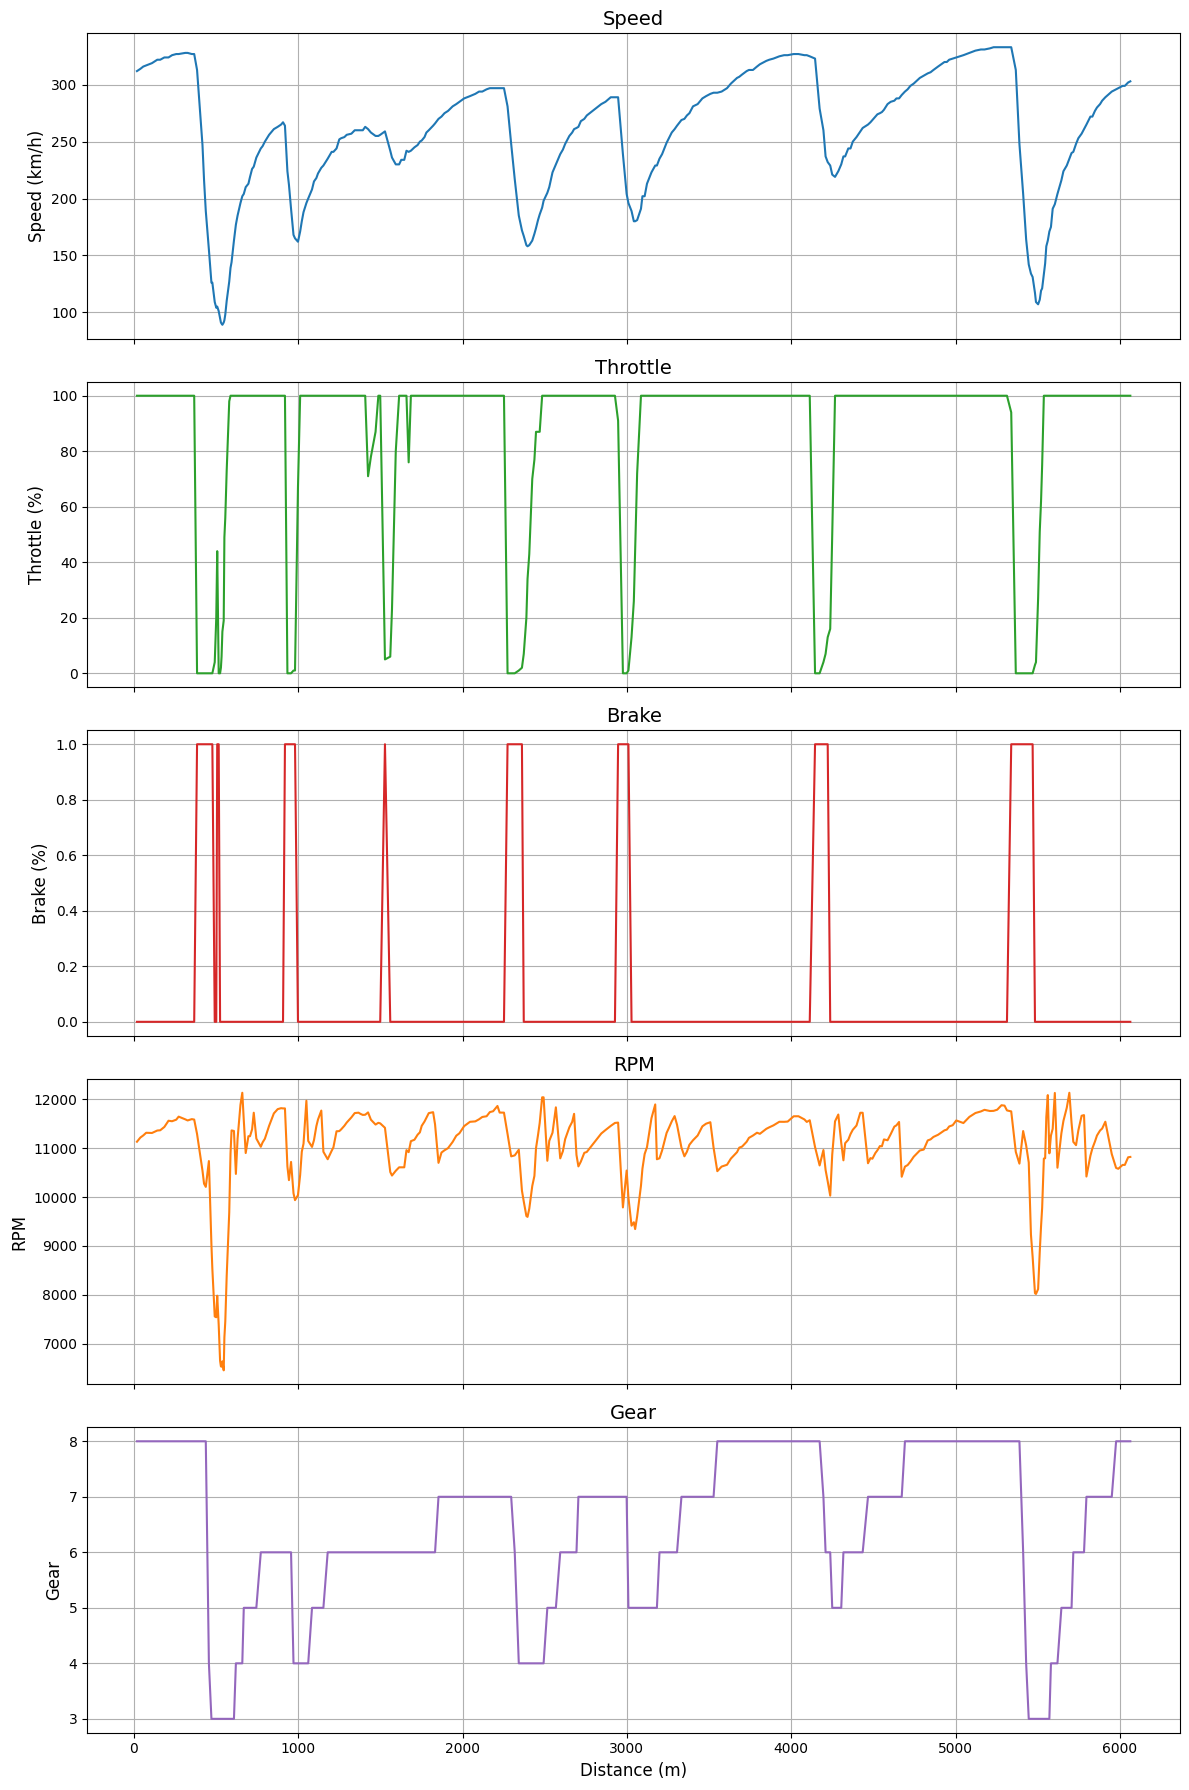

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

axes[0].plot(telemetry['Distance'], telemetry['Speed'], color='tab:blue')
axes[0].set_ylabel('Speed (km/h)', fontsize=12)
axes[0].set_title('Speed', fontsize=14)
axes[0].grid(True)

axes[1].plot(telemetry['Distance'], telemetry['Throttle'], color='tab:green')
axes[1].set_ylabel('Throttle (%)', fontsize=12)
axes[1].set_title('Throttle', fontsize=14)
axes[1].grid(True)

axes[2].plot(telemetry['Distance'], telemetry['Brake'], color='tab:red')
axes[2].set_ylabel('Brake (%)', fontsize=12)
axes[2].set_title('Brake', fontsize=14)
axes[2].grid(True)

axes[3].plot(telemetry['Distance'], telemetry['RPM'], color='tab:orange')
axes[3].set_ylabel('RPM', fontsize=12)
axes[3].set_title('RPM', fontsize=14)
axes[3].grid(True)

axes[4].plot(telemetry['Distance'], telemetry['nGear'], color='tab:purple')
axes[4].set_xlabel('Distance (m)', fontsize=12)
axes[4].set_ylabel('Gear', fontsize=12)
axes[4].set_title('Gear', fontsize=14)
axes[4].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
fastest_lap = session.laps.pick_fastest()
telemetry = fastest_lap.get_telemetry().add_distance()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


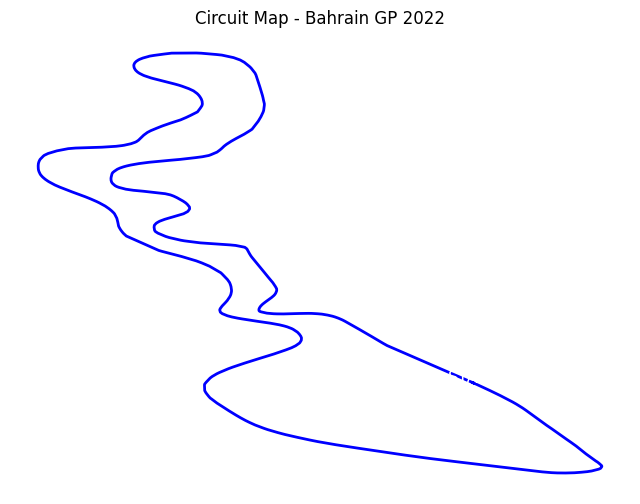

In [ ]:
plt.figure(figsize=(8, 6))

# Plot the X and Y GPS data to recreate the track layout
plt.plot(telemetry['X'], telemetry['Y'], color='blue', linewidth=2)

# Mark the start position
start_x = telemetry['X'].iloc[0]
start_y = telemetry['Y'].iloc[0]
plt.text(start_x, start_y, 'START', color='white', fontsize=12, ha='center')

plt.title("Circuit Map - Bahrain GP 2022")
plt.axis('off')  # Hide the axis for a clean look
plt.show()

In [ ]:
session1 = fastf1.get_session(2022, 'Saudi Arabia', 'Q')
session1.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Failed to parse timestamp '' in Ergastresponse.
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processi

In [ ]:
import plotly.graph_objs as go

# Create a figure
fig = go.Figure()

# Add circuit map
fig.add_trace(go.Scatter(
    x=telemetry['X'],
    y=telemetry['Y'],
    mode='lines',
    name='Circuit Map',
    line=dict(color='blue', width=2)
))

# Add start position annotation
fig.add_annotation(
    x=telemetry['X'].iloc[0],
    y=telemetry['Y'].iloc[0],
    text='START',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color='white')
)

# Create a second figure for speed telemetry
speed_fig = go.Figure()

# Add speed telemetry
speed_fig.add_trace(go.Scatter(
    x=telemetry['Distance'],
    y=telemetry['Speed'],
    mode='lines',
    name='Speed Telemetry',
    line=dict(color='red')
))

speed_fig.update_layout(
    title='Speed Telemetry',
    xaxis_title='Distance (m)',
    yaxis_title='Speed (km/h)',
    showlegend=True
)

# Show the figures
fig.show()
speed_fig.show()


In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 55.4 MB/s eta 0:00:00


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='circuit-map', figure=fig),
    dcc.Graph(id='speed-plot', figure=speed_fig),
    html.Div(id='output-speed')
])

@app.callback(
    Output('output-speed', 'children'),
    Input('circuit-map', 'clickData')
)
def display_speed(clickData):
    if clickData is not None:
        point_index = clickData['points'][0]['pointIndex']
        speed_value = telemetry['Speed'].iloc[point_index]
        return f'Speed: {speed_value:.2f} km/h'
    return "Click on the circuit map to see speed."

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
  pip install dash flask-ngrok

In [ ]:
import dash
from dash import Dash, dcc, html, Input, Output
from flask_ngrok import run_with_ngrok

app = Dash(__name__)
run_with_ngrok(app)



app.layout = html.Div([
    dcc.Graph(id='circuit-map', figure=fig),
    dcc.Graph(id='speed-plot', figure=speed_fig),
    html.Div(id='output-speed', style={'fontSize': '24px', 'color': 'black', 'fontWeight': 'bold', 'marginTop': '20px'})
])

@app.callback(
    [Output('output-speed', 'children'),
     Output('circuit-map', 'figure')],
    Input('circuit-map', 'clickData')
)
def display_speed(clickData):
    if clickData is not None:
        point_index = clickData['points'][0]['pointIndex']
        speed_value = telemetry['Speed'].iloc[point_index]

        # Get the clicked coordinates
        clicked_x = telemetry['X'].iloc[point_index]
        clicked_y = telemetry['Y'].iloc[point_index]

        # Create a marker for the clicked point
        marker_fig = go.Figure(data=fig.data)  # Copy existing figure data
        marker_fig.add_trace(go.Scatter(
            x=[clicked_x],
            y=[clicked_y],
            mode='markers',
            marker=dict(color='yellow', size=10, symbol='cross'),
            name='Clicked Point'
        ))

        return f'Speed: {speed_value:.2f} km/h', marker_fig

    return "Click on the circuit map to see speed.", fig

if __name__ == '__main__':
    app.run_server()

<IPython.core.display.Javascript object>